In [1]:
##Projeto de Análise de Acidentes do Sistema Anchieta-Imigrantes entre 2010 e 2019

In [2]:
import pandas as pd

#Caminho para o arquivo CSV
file_path = 'Acidentes no Sistema Anchieta-Imigrantes.csv'

#Carregar os dados
data = pd.read_csv(file_path, delimiter = ';')

In [3]:
#Limpar os dados e garantir que estamos trabalhando com o DataFrame original
data_clean = data.loc[:, ['Data', 'Acidentes no Sistema Anchieta-Imigrantes']]
data_clean.loc[:, 'Data'] = pd.to_datetime(data_clean['Data'], format = '%d.%m.%Y')

#Exibir primeiras linhas dos dados limpos
data_clean.head()

,Data,Acidentes no Sistema Anchieta-Imigrantes
0,2010-01-01,751
1,2010-02-01,531
2,2010-03-01,490
3,2010-04-01,538
4,2010-05-01,523


In [4]:
#Estatísticas descritivas
data_clean.describe()

,Acidentes no Sistema Anchieta-Imigrantes
count,144.000000
mean,391.694444
std,93.162035
min,130.000000
25%,330.750000
50%,375.000000
75%,446.500000
max,751.000000


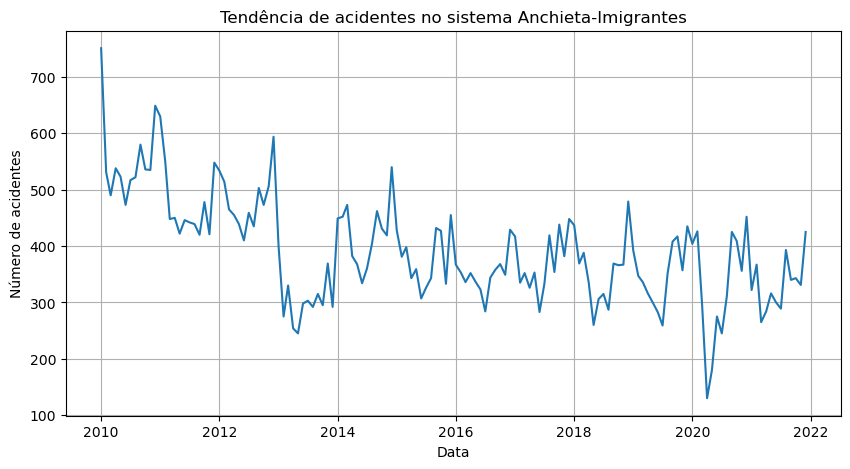

In [5]:
import matplotlib.pyplot as plt

#Gerar gráfico de tendência
plt.figure(figsize=(10,5))
plt.plot(data_clean['Data'], data_clean['Acidentes no Sistema Anchieta-Imigrantes'])
plt.title('Tendência de acidentes no sistema Anchieta-Imigrantes')
plt.xlabel('Data')
plt.ylabel('Número de acidentes')
plt.grid(True)
plt.show()

In [6]:
#Filtrar dados para excluir anos de 2020 e 2021 (Pandemia)
data_clean = data_clean[~data_clean['Data'].dt.year.isin([2020, 2021])]

#Exibir primeiras linhas dos dados filtrados
data_clean.head()

,Data,Acidentes no Sistema Anchieta-Imigrantes
0,2010-01-01,751
1,2010-02-01,531
2,2010-03-01,490
3,2010-04-01,538
4,2010-05-01,523


In [7]:
#Calcular a média móvel com uma janela de 6 meses
data_clean['Média Móvel'] = data_clean['Acidentes no Sistema Anchieta-Imigrantes'].rolling(window = 6).mean()

#Definir um limite para identificar picos
data_clean['Pico'] = data_clean['Acidentes no Sistema Anchieta-Imigrantes'] > (1 * data_clean['Média Móvel'])

#Exibir as linhas onde há picos
picos = data_clean[data_clean['Pico']]
picos

,Data,Acidentes no Sistema Anchieta-Imigrantes,Média Móvel,Pico
6,2010-07-01,517,512.000000,True
7,2010-08-01,522,510.500000,True
8,2010-09-01,580,525.500000,True
9,2010-10-01,536,525.166667,True
10,2010-11-01,535,527.166667,True
11,2010-12-01,649,556.500000,True
12,2011-01-01,630,575.333333,True
21,2011-10-01,478,441.166667,True
23,2011-12-01,548,458.000000,True
24,2012-01-01,534,473.333333,True


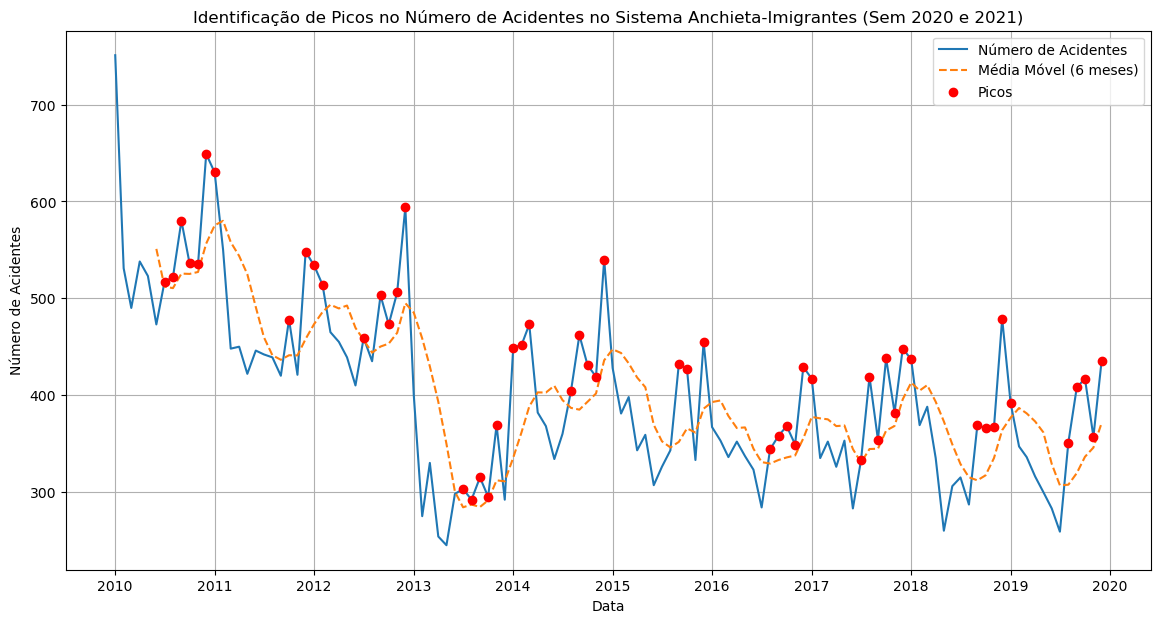

In [8]:
plt.figure(figsize=(14, 7))
plt.plot(data_clean['Data'], data_clean['Acidentes no Sistema Anchieta-Imigrantes'], label='Número de Acidentes')
plt.plot(data_clean['Data'], data_clean['Média Móvel'], label='Média Móvel (6 meses)', linestyle='--')

# Destacar os picos
plt.scatter(picos['Data'], picos['Acidentes no Sistema Anchieta-Imigrantes'], color='red', label='Picos', zorder=5)

plt.title('Identificação de Picos no Número de Acidentes no Sistema Anchieta-Imigrantes (Sem 2020 e 2021)')
plt.xlabel('Data')
plt.ylabel('Número de Acidentes')
plt.legend()
plt.grid(True)
plt.show()

In [9]:
#Comparação por Ano, comparar o número total de acidentes por ano e identificar se houve melhorias ou pioras ao longo do tempo

In [10]:
#Adicionar uma coluna com o ano
data_clean['Ano'] = data_clean['Data'].dt.year

#Agrupar por ano e somar o número de acidentes
acidentes_por_ano = data_clean.groupby('Ano')['Acidentes no Sistema Anchieta-Imigrantes'].sum().reset_index()

#Exibir dados carregados
acidentes_por_ano

,Ano,Acidentes no Sistema Anchieta-Imigrantes
0,2010,6645
1,2011,5694
2,2012,5787
3,2013,3668
4,2014,5074
5,2015,4532
6,2016,4200
7,2017,4440
8,2018,4278
9,2019,4201


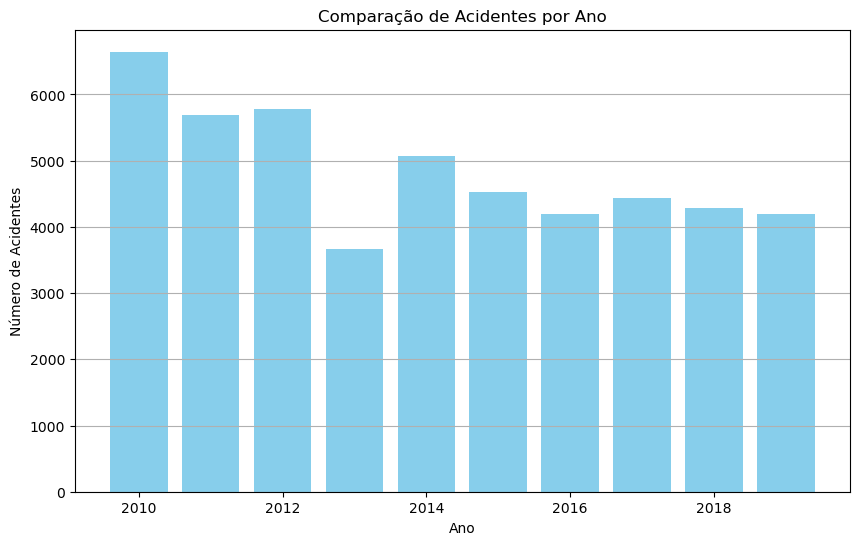

In [11]:
plt.figure(figsize=(10, 6))
plt.bar(acidentes_por_ano['Ano'], acidentes_por_ano['Acidentes no Sistema Anchieta-Imigrantes'], color='skyblue')

plt.title('Comparação de Acidentes por Ano')
plt.xlabel('Ano')
plt.ylabel('Número de Acidentes')
plt.grid(axis='y')
plt.show()

In [12]:
#Análise de comparação por dia da semana, verificar se há tendência dependendo do dia da semana

In [13]:
#Adicionar uma coluna com o dia da semana
data_clean['Dia da semana'] = data_clean['Data'].dt.day_name()

#Agrupar por dia da semana e calcular a média de acidentes
acidentes_por_dia = data_clean.groupby('Dia da semana')['Acidentes no Sistema Anchieta-Imigrantes'].mean().reset_index()

#Ordenar os dias da semana
dias_ordenados = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
acidentes_por_dia['Dia da semana'] = pd.Categorical(acidentes_por_dia['Dia da semana'], categories = dias_ordenados, ordered=True)
acidentes_por_dia = acidentes_por_dia.sort_values('Dia da semana')

#Exibir os dados agregados
acidentes_por_dia

,Dia da semana,Acidentes no Sistema Anchieta-Imigrantes
1,Monday,397.764706
5,Tuesday,401.647059
6,Wednesday,399.812500
4,Thursday,414.941176
0,Friday,393.526316
2,Saturday,429.437500
3,Sunday,396.111111


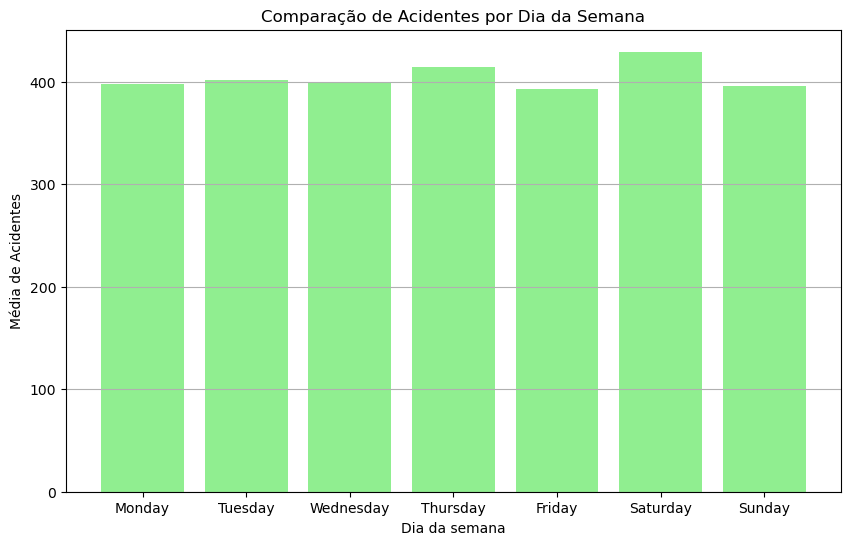

In [14]:
#Visualizar comparação por dia da semana

plt.figure(figsize=(10, 6))
plt.bar(acidentes_por_dia['Dia da semana'], acidentes_por_dia['Acidentes no Sistema Anchieta-Imigrantes'], color='lightgreen')

plt.title('Comparação de Acidentes por Dia da Semana')
plt.xlabel('Dia da semana')
plt.ylabel('Média de Acidentes')
plt.grid(axis='y')
plt.show()